# **Final Assignment**: Majorcan *Airbnb* Price Prediction using Regression models
#### **Author**: Miruna Andreea Gheata
#### **Date**: 31/01/2021
#### **Last Modified**: 16/02/2021

***

# **Table of contents**

[1. Introduction and project aims](#first-bullet)

[2. The dataset](#second-bullet)

[3. Cleaning and pre-processing the data](#third-bullet)
   - [Dropping initial columns](#third-first-bullet)
   - [Feature pre-processing](#third-second-bullet)
   
[4. Exploratory data analysis](#fourth-bullet)

[5. Building the regression models](#fifth-bullet)
   - [Preparing the data for modeling](#fifth-first-bullet)
   - [Implementing the models](#fifth-second-bullet)
   
[6. Conclusions](#sixth-bullet)

[7. Bibliography](#seventh-bullet)


***

# **1. Introduction and project aims** <a class="anchor" id="first-bullet"></a>

### **Question**: *Is it possible to predict the price of Majorca's Airbnb rentals?*

Airbnb is a home-sharing platform that allows home-owners and renters ('hosts') to put their properties ('listings') online, so that guests can pay to stay in them. Hosts are expected to set their own prices for their listings. Although Airbnb and other sites provide some general guidance, there are currently no free services which help hosts price their properties. Paid third party pricing software is available, but generally you are required to put in your own expected average price ('base price'), and the algorithm will vary the daily price around that base price on each day depending on day of the week, seasonality, how far away the date is, and other factors [1].

This project aims to use **machine learning** (ML) techniques in order to predict the price for properties (referred to as listings) in Majorca. The ML approach that will be taken to predict the price is by **applying regression models** to the given data. 

This Jupyter notebook can be found in this [Github repository](https://github.com/magheata/airbnb_price_regression).


***

# **2. The dataset** <a class="anchor" id="second-bullet"></a>

In [1]:
import pandas as pd
airbnb = pd.read_csv('airbnb.csv')

In [2]:
print(f"The dataset contains {len(airbnb)} Airbnb listings. There are {airbnb.shape[1]} features available.\n")
pd.set_option('display.max_columns', len(airbnb.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
airbnb.head(3)

The dataset contains 17608 Airbnb listings. There are 74 features available.



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",.,within an hour,100%,96%,f,https://a0.muscache.com/im/users/42942/profile...,https://a0.muscache.com/im/users/42942/profile...,NaN,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Calvià,NaN,39.51888,2.48182,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Oven"", ""Wifi"", ""Coffee maker"", ""Dishes and s...",$89.00,5,60,5,5,60,60,5.0,60.0,NaN,t,13,43,73,311,2020-09-21,103,8,2,2011-08-23,2020-09-06,96.0,10.0,9.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,Somos una pareja con los mismos gustos e inter...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/529151/profil...,https://a0.muscache.com/im/users/529151/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Santa Margalida,NaN,39.76347,3.16255,Entire house,Entire home/apt,8,NaN,3 baths,4.0,7.0,"[""First aid kit"", ""Hair dryer"", ""Iron"", ""Washe...",$175.00,7,365,7,7,1125,1125,7.0,1125.0,NaN,t,0,0,0,0,2020-09-21,30,13,0,2019-01-18,2020-01-25,100.0,10.0,10.0,10.0,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47
2,105891,https://www.airbnb.com/rooms/105891,20200919153121,2020-09-20,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,The village's population does not reach two th...,https://a0.muscache.com/pictures/1036816/f36ce...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",Hola!. Resido en una casa de campo de un puebl...,within a few hours,100%,83%,t,https://a0.muscache.com/im/users/549192/profil...,https://a0.muscache.com/im/users/549192/profil...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,NaN,39.66044,3.07165,Entire townhouse,Entire home/apt,6,NaN,2 baths,3.0,4.0,"[""Smoke alarm"", ""Oven"", ""Wifi"", ""Garden or bac...",$140.00,6,365,6,6,365,365,6.0,365.0,NaN,t,23,53,83,325,2020-09-20,14,0,0,2012-06-19,2019-09-03,97.0,10.0,10.0,10.0,10.0,9.0,10.0,ETV/6127,t,2,2,0,0,0.14


***

# **3. Cleaning and pre-processing the data** <a class="anchor" id="third-bullet"></a>

A problem that can arise when dealing with ML tasks (e.g. prediction, classification) is that the data provided for the study is not clean: it contains a large amount of invalid data (e.g. null values, outliers), duplicated information, unscaled values, and so forth. The concept of <i>"Garbage in, garbage out"</i> describes the fact that the prediction model will perform poorly (give *garbage* results) if it is given unprocessed data (*garbage* data). In order to avoid having a bad model because it was not trained with suitable data, we will *pre-process* the Airbnb data as the first step of this prediction task.

### *3.0.1 Library imports*

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

### *3.0.2. Functions definitions*

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
def na_count(df):
    print('Feature                     Number of NaN')
    print(df.isnull().sum().sort_values(ascending=True))#.loc[lambda x : x!=0])

## **3.1. Dropping initial columns** <a class="anchor" id="third-first-bullet"></a>

The dataset has several features that do not offer any special meaning without applying pertinent techniques (such as NLP). Therefore, we will delete any text-related features, as well as other non-neccesary features (e.g. listing id, urls, host information, scraping information). 

In [5]:
airbnb = airbnb.drop(columns=['id', 'name', 'description', 'neighborhood_overview'])
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='host')))]
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='url')))]
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='scrape')))]
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='ntm')))]
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='calendar')))]
airbnb = airbnb[airbnb.columns.drop(list(airbnb.filter(regex='review')))]

Any features that do not have any values (neighbourhood_group_cleansed, bathrooms) or have a considerable amount of null values will also be deleted (neighbourhood). 

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood                 8213 non-null   object 
 1   neighbourhood_cleansed        17608 non-null  object 
 2   neighbourhood_group_cleansed  0 non-null      float64
 3   latitude                      17608 non-null  float64
 4   longitude                     17608 non-null  float64
 5   property_type                 17608 non-null  object 
 6   room_type                     17608 non-null  object 
 7   accommodates                  17608 non-null  int64  
 8   bathrooms                     0 non-null      float64
 9   bathrooms_text                17600 non-null  object 
 10  bedrooms                      17333 non-null  float64
 11  beds                          17511 non-null  float64
 12  amenities                     17608 non-null  object 
 13  p

In [7]:
airbnb = airbnb.drop(columns=['neighbourhood_group_cleansed',
                              'neighbourhood',
                              'bathrooms'])

As for the minimum and maximum number of nights that a booking needs to have, only the features ``minimum_nights`` and ``maximum_nights`` will be kept. As for the availability, this study will only consider those listings that are available for a period of 90 days. 

In [8]:
airbnb = airbnb.drop(columns=['minimum_minimum_nights',
                              'maximum_minimum_nights',
                              'minimum_maximum_nights',
                              'maximum_maximum_nights',
                              'availability_30',
                              'availability_60',
                              'availability_365',
                              'license',
                              'instant_bookable'
                             ])

Next, let's plot the histogram of the feature ``has_availability`` to determine wether or not it provides useful data for the prediction.

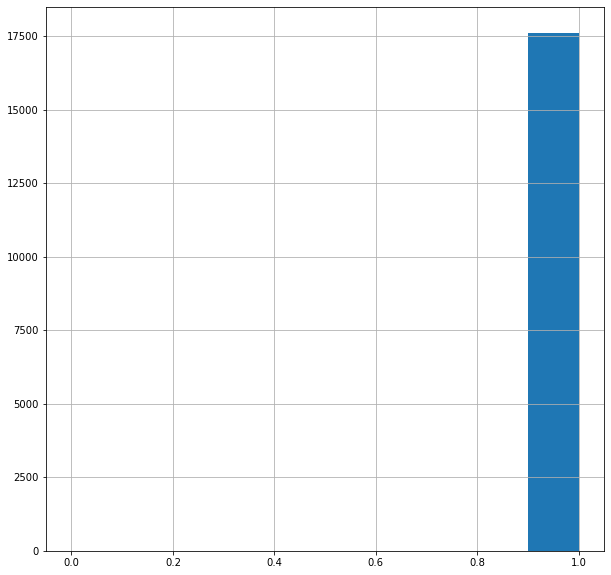

In [9]:
# Replacing columns with f/t with 0/1
airbnb.has_availability.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
airbnb.has_availability.hist(figsize=(10,10));

This feature is not useful as it only has one value (all of the listings are available). Therefore, it will be deleted as it redundant information.

In [10]:
airbnb = airbnb.drop(columns=['has_availability'])

## **3.2. Feature pre-processing** <a class="anchor" id="third-second-bullet"></a>

The remaining features of this dataset are:

In [11]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  17608 non-null  object 
 1   latitude                17608 non-null  float64
 2   longitude               17608 non-null  float64
 3   property_type           17608 non-null  object 
 4   room_type               17608 non-null  object 
 5   accommodates            17608 non-null  int64  
 6   bathrooms_text          17600 non-null  object 
 7   bedrooms                17333 non-null  float64
 8   beds                    17511 non-null  float64
 9   amenities               17608 non-null  object 
 10  price                   17608 non-null  object 
 11  minimum_nights          17608 non-null  int64  
 12  maximum_nights          17608 non-null  int64  
 13  availability_90         17608 non-null  int64  
dtypes: float64(4), int64(4), object(6)
mem

### Description of each feature:
- ``neighbourhood_cleansed`` - the Majorca neighborhood the property is in.
- ``property_type`` - type of property, e.g. house or flat.
- ``room_type`` - type of listing, e.g. entire home, private room or shared room.
- ``accommodates`` - how many people the property accommodates.
- ``bathrooms_text`` - number of bathrooms.
- ``bedrooms`` - number of bedrooms.
- ``beds`` - number of beds.
- ``amenities`` - list of amenities.
- ``price`` - nightly advertised price (the **target** variable).
- ``minimum_nights`` - the minimum length of stay.
- ``maximum_nights`` - the maximum length of stay.
- ``availability_90`` - how many nights are available to be booked in the next 90 days.

Next, we will analyze each individual feature and apply the neccesary processing techniques.

#### ``price``

First, let's analyze the **target variable**.

In [12]:
airbnb['price'].head()

0     $89.00
1    $175.00
2    $140.00
3    $200.00
4    $110.00
Name: price, dtype: object

This variable needs to be transformed to a numerical format.

In [13]:
airbnb['price'] = airbnb['price'].str.replace("$","").str.replace(",","").astype(float)
airbnb['price'].head()

0     89.0
1    175.0
2    140.0
3    200.0
4    110.0
Name: price, dtype: float64

In [14]:
airbnb['price'].describe()

count    17608.000000
mean       244.383561
std        409.958169
min          0.000000
25%        110.000000
50%        179.000000
75%        275.000000
max      20736.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

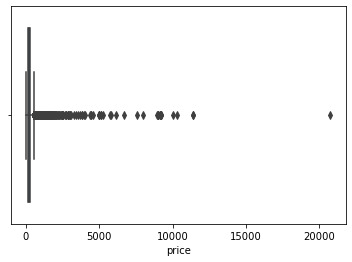

In [15]:
sns.boxplot(x=airbnb["price"])

The price feature contains many outliers; there is a listing that has a price of \\$20.736, but the mean of the prices is \\$244. Looking at the amount of listings with each price, we can see that the most usual prices are below 450. We will filter the dataset so that we will only take into consideration those listings with a price between \\$1 and \\$440. 

In [16]:
airbnb.price.value_counts().head(50)

150.0    304
100.0    304
120.0    247
200.0    225
90.0     199
80.0     197
70.0     195
250.0    194
140.0    178
160.0    177
110.0    163
50.0     163
180.0    162
130.0    161
125.0    155
170.0    142
60.0     140
190.0    133
85.0     131
300.0    130
75.0     126
65.0     126
95.0     123
175.0    119
115.0    117
350.0    116
220.0    108
135.0    106
210.0    103
230.0    101
40.0     101
195.0     95
105.0     95
145.0     91
165.0     90
240.0     88
55.0      83
185.0     82
159.0     80
155.0     78
45.0      76
280.0     76
225.0     74
30.0      73
169.0     71
129.0     70
99.0      70
35.0      68
179.0     67
215.0     66
Name: price, dtype: int64

In [17]:
airbnb = airbnb.loc[(airbnb.price <=440) & (airbnb.price>0)]

<AxesSubplot:xlabel='price'>

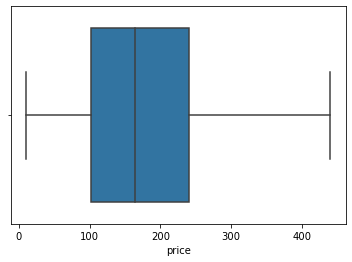

In [18]:
sns.boxplot(x=airbnb["price"])

In [19]:
airbnb['price'].describe()

count    15921.000000
mean       178.451532
std         95.569292
min         10.000000
25%        102.000000
50%        164.000000
75%        240.000000
max        440.000000
Name: price, dtype: float64

#### ``property-type``

This feature represents the types of properties that can be found in the dataset. 

In [20]:
old_property_count = len(airbnb.property_type.unique())
print(f"There are {len(airbnb.property_type.unique())} different types of properties in this dataset. The amount of listings for each one of them is: \n\n{airbnb.property_type.value_counts()}")

There are 73 different types of properties in this dataset. The amount of listings for each one of them is: 

Entire house                          4363
Entire villa                          3982
Entire apartment                      3201
Entire cottage                         811
Private room in apartment              630
Entire chalet                          593
Entire townhouse                       357
Private room in house                  286
Entire condominium                     282
Room in boutique hotel                 186
Room in hotel                           98
Entire guesthouse                       95
Earth house                             94
Private room in bed and breakfast       91
Entire loft                             78
Entire serviced apartment               70
Entire guest suite                      55
Room in serviced apartment              49
Private room in villa                   48
Entire bungalow                         48
Private room in cottage       

This dataset has many different types of properties, but only a few of them have a large amount of listings in the dataset. In order to compress the information that this feature provides, we will group the different property types into three new property types: **House**, **Apartment** and **Other**. Note that this does not mean that any information is lost, even if we are *reducing* it. From 74 property types, we go down to only 3.

In [21]:
# Replacing categories that are types of houses or apartments
airbnb.property_type.replace({
    'Townhouse': 'House',
    'Entire house': 'House',
    'Entire apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Entire bungalow': 'House',
    'Entire cottage': 'House',
    'Entire villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Casa particular': 'House',
    'Entire chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
airbnb.loc[~airbnb.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [22]:
print(f"We have reduced the information from {old_property_count} property types to only {len(airbnb.property_type.unique())} property types. The amount of listings for each one of them is: \n\n{airbnb.property_type.value_counts()}")

We have reduced the information from 73 property types to only 3 property types. The amount of listings for each one of them is: 

House        9897
Apartment    3349
Other        2675
Name: property_type, dtype: int64


#### ``bathrooms_text``, ``beds``, ``bedrooms``

In [23]:
na_count(airbnb)

Feature                     Number of NaN
neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
amenities                   0
price                       0
minimum_nights              0
maximum_nights              0
availability_90             0
bathrooms_text              7
beds                       81
bedrooms                  263
dtype: int64


After checking for null values, it has been found that features ``bathroom_text``, ``beds`` and ``bedrooms`` have a few missing values. In order to deal with it we will use the median of each one of them to replace the null values. However, notice how feature ``bathroom_text`` is a string.

In [24]:
airbnb.bathrooms_text.head()

0     1 bath
1    3 baths
2    2 baths
3     1 bath
4     1 bath
Name: bathrooms_text, dtype: object

The digit that represents the number of bathrooms of a listing will be extracted and will be saved in a new feature ``bathrooms``.

In [25]:
airbnb['bathrooms'] = airbnb.bathrooms_text.str.extract('(\d+)')
airbnb = airbnb.drop(columns=['bathrooms_text'])
airbnb = airbnb.dropna()
airbnb['bathrooms'] = airbnb['bathrooms'].astype(str).astype(int)

Now, we can add replace the null values of the desired features with the median.

In [26]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    airbnb[col].fillna(airbnb[col].median(), inplace=True)

In [27]:
na_count(airbnb)

Feature                     Number of NaN
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
availability_90           0
bathrooms                 0
dtype: int64


#### ``amenities``

Amenities is a list of additional features in the property, e.g. whether it has a TV or parking. Examples are below:

In [28]:
# Example of amenities listed
airbnb.amenities[:1].values

array(['["Oven", "Wifi", "Coffee maker", "Dishes and silverware", "Essentials", "Kitchen", "TV", "Cooking basics", "Refrigerator", "Shampoo", "Microwave", "Pool", "Beachfront", "Free parking on premises", "Free street parking", "Air conditioning", "Host greets you", "Elevator", "Hot water", "Patio or balcony", "Stove", "Washer", "Heating"]'],
      dtype=object)

In [29]:
# Creating a set of all possible amenities
amenities_list = list(airbnb.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Air conditioning',
 'BBQ grill',
 'BBQ grill Hair dryer',
 'BBQ grill Oven',
 'BBQ grill Pool',
 'BBQ grill Smoke alarm',
 'Baby bath',
 'Baby bath Oven',
 'Baby monitor',
 'Babysitter recommendations',
 'Babysitter recommendations Extra pillows and blankets',
 'Babysitter recommendations Oven',
 'Babysitter recommendations Pool',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Bathtub  Hair dryer',
 'Bathtub  Oven',
 'Bathtub Air conditioning',
 'Bathtub Beachfront',
 'Bathtub Body soap',
 'Bathtub Building staff',
 'Bathtub Crib',
 'Bathtub Extra pillows and blankets',
 'Bathtub First aid kit',
 'Bathtub Free parking on premises',
 'Bathtub Free street parking',
 'Bathtub Hair dryer',
 'Bathtub Hangers',
 'Bathtub Iron',
 'Bathtub Kitchen',
 'Bathtub Oven',
 'Bathtub Pack \\u2019n Play/travel crib',
 'Bathtub Pool',
 'Bathtub Private living room',
 'Bathtub Room-darkening shades',
 'Bathtub Smoke alarm',
 'Bathtub Washer',
 'Bathtub Wifi',
 'Beach essentials',
 'Beach essentia

In the list above, some amenities are more important than others (e.g. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (e.g. 'Wine cellar'). A selection of the more important amenities will be extracted. 

The amenities chosen are (slashes indicate separate categories that can be combined):
- Air conditioning/central air conditioning
- Anything containing 'children'
- BBQ grill/BBQ grill Beachfront/BBQ grill Pool
- Balcony/patio
- Beachfront/Lake access/Mountain view/Ski-in Ski-out/Waterfront (i.e. great location/views)
- Bed linens
- Breakfast
- TV
- Coffee maker/Nespresso machine
- Cooking basics
- Dishwasher/Dryer/Washer
- Elevator
- Gym
- Free parking on premises/parking/Free street parking
- Garden or /outdoor/terrace
- Game Console/smart TV (i.e. non-basic electronics)
- Host greets you
- Hot tub/pool
- Internet/pocket wifi/wifi
- Long term stays allowed
- Private entrance

In [30]:
airbnb.loc[airbnb['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Game console|Record player|Smart TV'), 'high_end_electronics'] = 1
airbnb.loc[airbnb['amenities'].str.contains('BBQ grill|BBQ grill Beachfront|BBQ grill Pool'), 'bbq'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
airbnb.loc[airbnb['amenities'].str.contains('TV'), 'tv'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Coffee maker|Nespresso machine'), 'coffee_machine'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Elevator'), 'elevator'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Gym|gym'), 'gym'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Children|children'), 'child_friendly'] = 1
airbnb.loc[airbnb['amenities'].str.contains('parking|Free parking on premises|Free street parking'), 'parking'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Garden|Outdoor|Terrace'), 'outdoor_space'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Hot tub|hot tub|Pool|pool'), 'hot_tub_or_pool'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Internet|Pocket wifi|Wifi|Ethernet connection'), 'internet'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1

Now, let's check if there are any amenities that almost all properties do not have. That feature will not be very useful in helping explain differences in prices, and will be consequently deleted from the dataframe.

In [31]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = airbnb.iloc[:,14:].columns
airbnb[cols_to_replace_nulls] = airbnb[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in airbnb.iloc[:,15:].columns:
    if airbnb[col].sum() < len(airbnb)/10:
        infrequent_amenities.append(col)
print(f"The infrequent amenities are: {infrequent_amenities}.")

# Dropping infrequent amenity features
airbnb.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
airbnb.drop('amenities', axis=1, inplace=True)

The infrequent amenities are: ['high_end_electronics', 'breakfast', 'elevator', 'gym'].


In [32]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15568 entries, 0 to 17607
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  15568 non-null  object 
 1   latitude                15568 non-null  float64
 2   longitude               15568 non-null  float64
 3   property_type           15568 non-null  object 
 4   room_type               15568 non-null  object 
 5   accommodates            15568 non-null  int64  
 6   bedrooms                15568 non-null  float64
 7   beds                    15568 non-null  float64
 8   price                   15568 non-null  float64
 9   minimum_nights          15568 non-null  int64  
 10  maximum_nights          15568 non-null  int64  
 11  availability_90         15568 non-null  int64  
 12  bathrooms               15568 non-null  int64  
 13  air_conditioning        15568 non-null  float64
 14  bbq                     15568 non-null

The categorical features ``neighbourhood_cleansed`` and ``room_type`` will be transformed into dummy variables for the prediction, so they will not be modified. The processed dataset looks like this:

In [33]:
airbnb.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,bathrooms,air_conditioning,bbq,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,child_friendly,parking,outdoor_space,host_greeting,hot_tub_or_pool,internet,long_term_stays,private_entrance
0,Calvià,39.51888,2.48182,Apartment,Entire home/apt,2,1.0,1.0,89.0,5,60,73,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,Santa Margalida,39.76347,3.16255,House,Entire home/apt,8,4.0,7.0,175.0,7,365,0,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Maria de la Salut,39.66044,3.07165,Other,Entire home/apt,6,3.0,4.0,140.0,6,365,83,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,Sant Llorenç des Cardassar,39.61600,3.30121,House,Entire home/apt,4,2.0,4.0,200.0,5,365,80,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,Palma de Mallorca,39.56478,2.60333,Other,Private room,2,1.0,2.0,110.0,2,365,90,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


***

# **4. Exploratory Data Analysis** <a class="anchor" id="fourth-bullet"></a>

In this section, the features will be analyzed and displayed in order to determine beforehand if there are any interesting factors that determine the price. 

### *4.0.1. Function definitions*

In [34]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    airbnb[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=30)
    plt.show()

In [35]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.70) # So that the suptitle does not overlap with the ax plot titles
    
    airbnb.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    airbnb.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

In [36]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

## **4.1. Number of people accommodated, bathrooms, bedrooms and beds**

*Question: what are the average number of people accommodated, bathrooms, bedrooms and beds in Airbnb listings in Majorca, and how do prices differ?*

Answer: the most common property setup are 5-6 in one property, with one bedroom and one bathroom. Unsurprisingly, properties that accommodate more people achieve noticeably higher nightly rates.

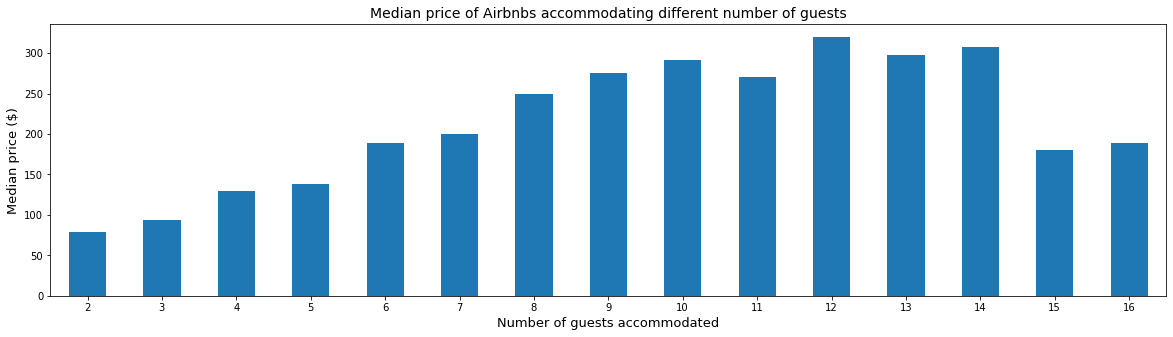

In [37]:
plt.figure(figsize=(20,5))
airbnb.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

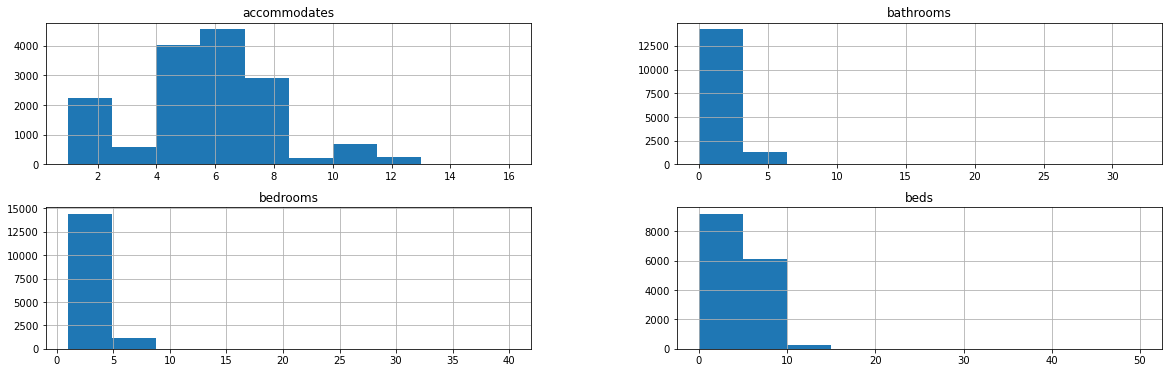

In [38]:
airbnb[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(20,6));

## **4.2. Property and room types**

*Question: what are the most common property and room types?*

Answer: about 63% of properties are houses. The remainder are apartments or more uncommon property types (e.g. 'boats' or 'windmill').

About 89% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 0.1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

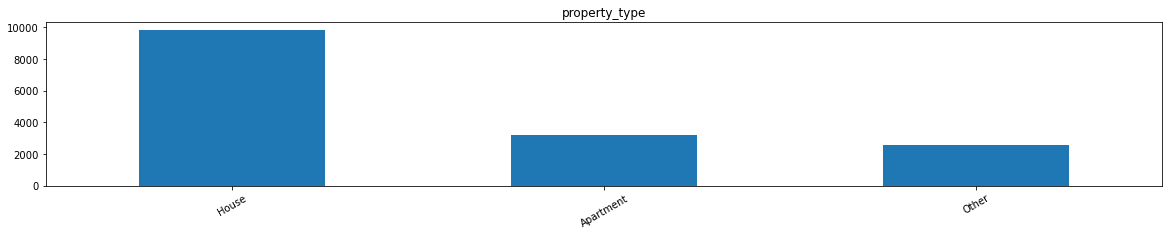

House        0.630717
Apartment    0.205999
Other        0.163284
Name: property_type, dtype: float64


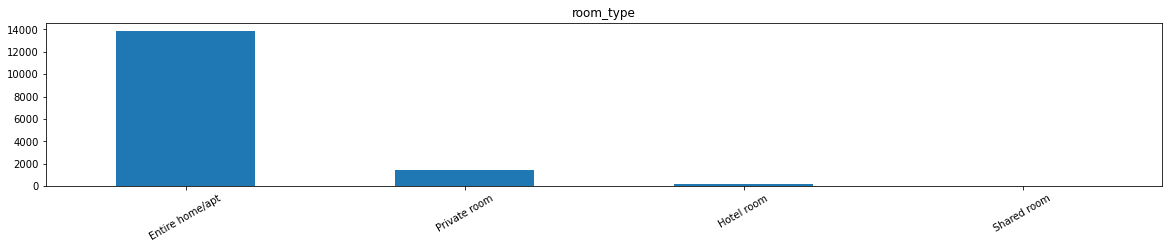

Entire home/apt    0.891765
Private room       0.094553
Hotel room         0.012526
Shared room        0.001156
Name: room_type, dtype: float64


In [39]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(20,3))
    print(airbnb[col].value_counts(normalize=True))

## **4.3. Amenities**

*Question: which amenities are common, and which increase the price of an Airbnb listing?*

Answer: amenities can be split into three main groups:

**1. Uncommon, but properties with it have a higher median price:**
- Barbecue
- Child friendly
- Host greeting
- Outdoor space
- Nature and views (e.g. beachfront, mountain view)
- Private entrance

**2. Most properties have it, and properties with it have a higher median price:**
- Air conditioning
- Long term stays allowed
- TV
- Hot tub or pool
- White goods (washer, dryer, dishwasher)

**3. Most properties have it, and there is no major difference in price between properties with and without it:**
- Balcony
- Basic cooking equipment
- Bed and linen
- Coffee machine
- Internet
- Parking
- White goods (washer, dryer, dishwasher)

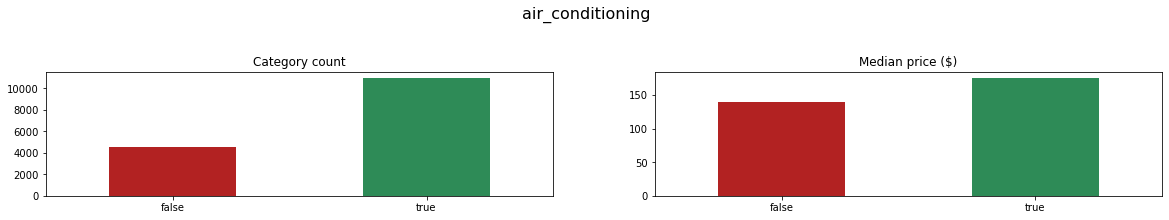

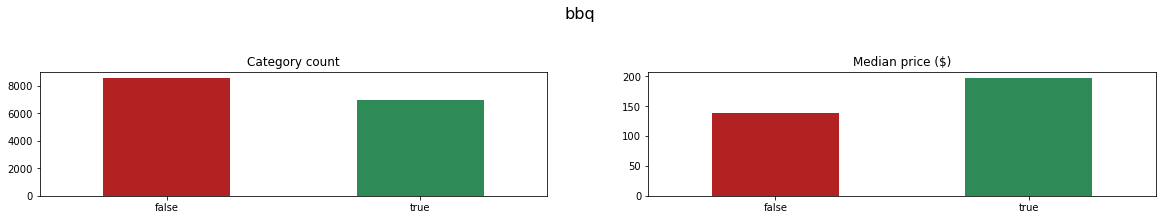

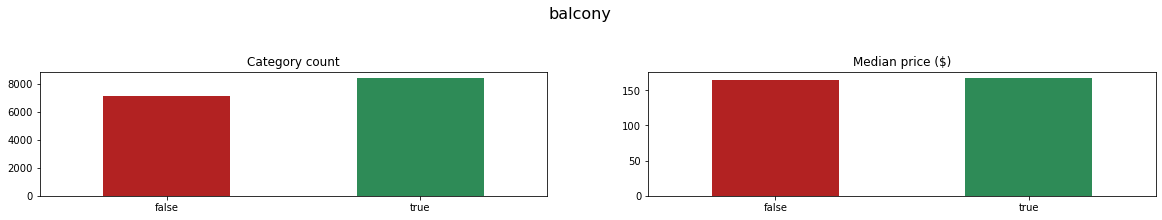

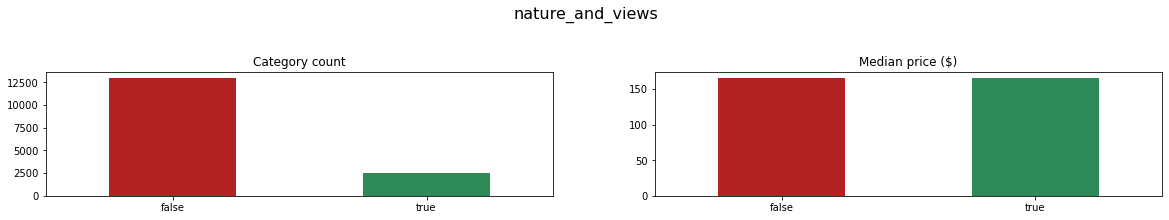

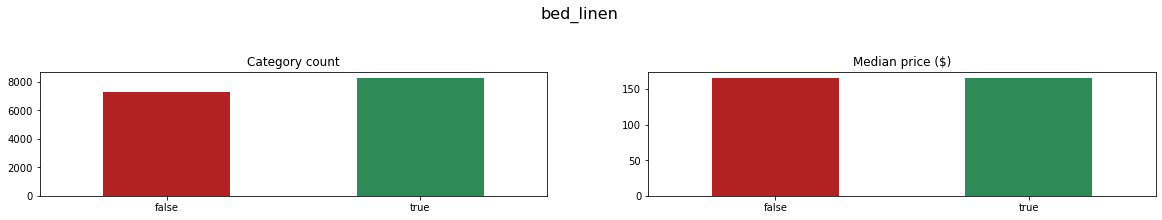

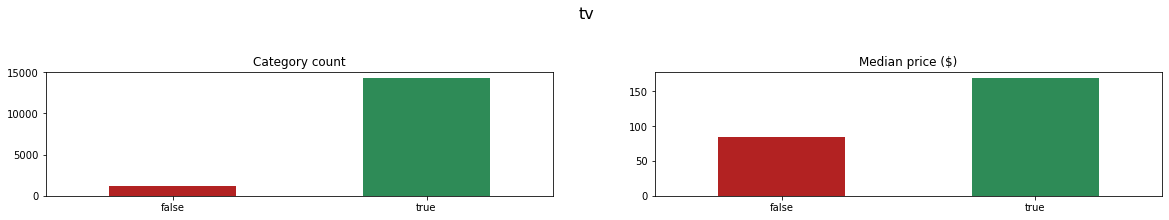

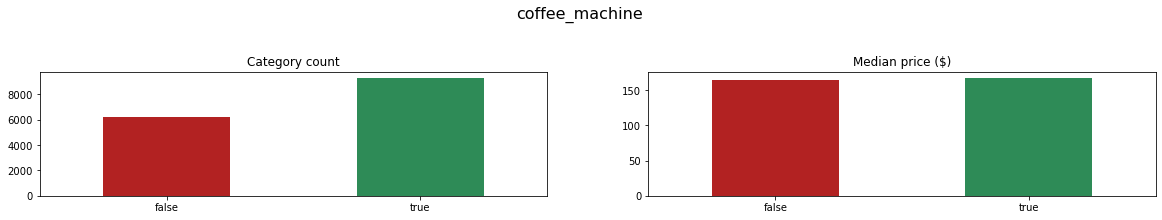

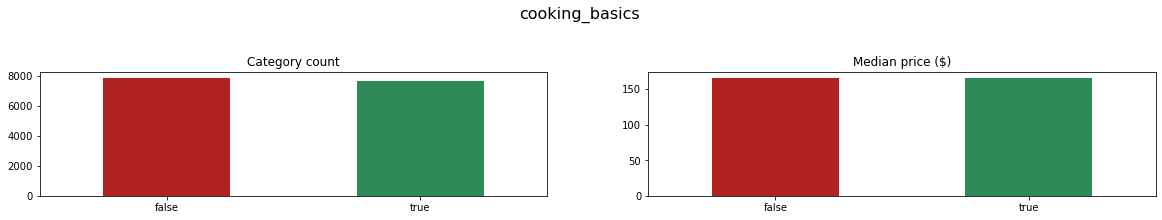

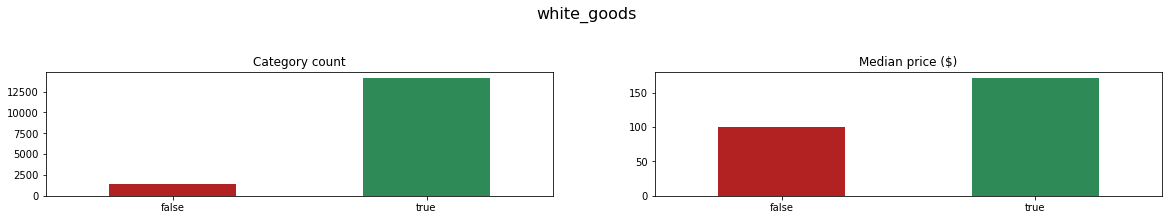

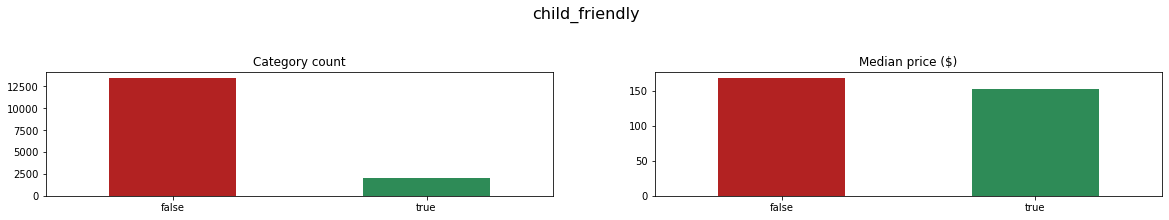

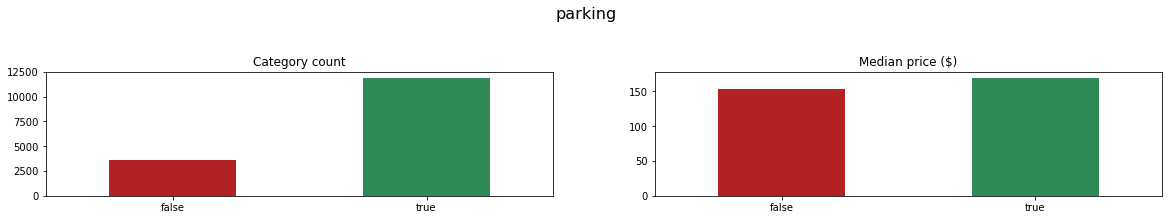

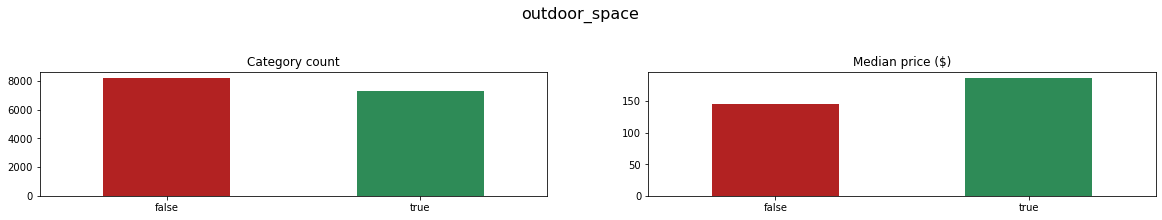

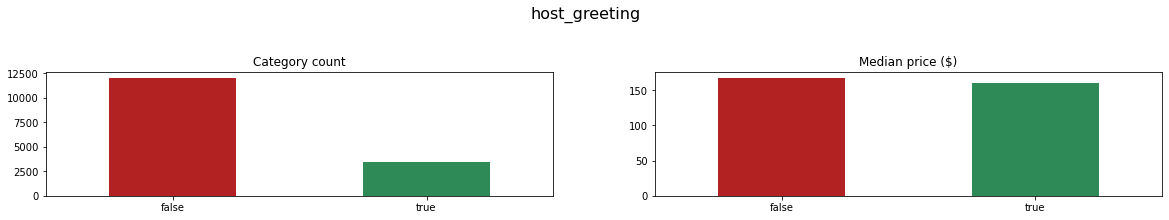

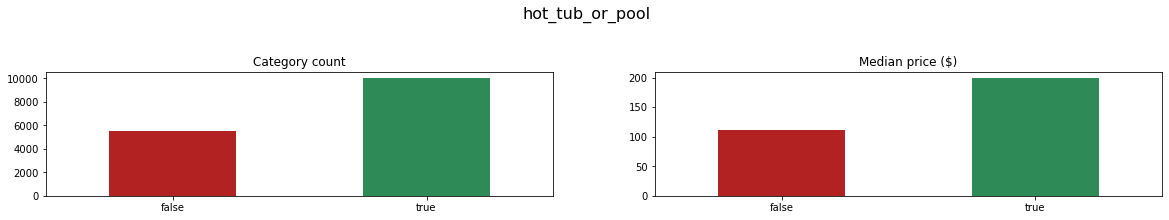

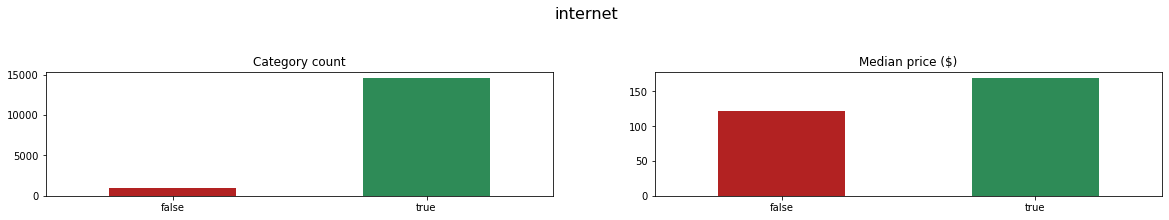

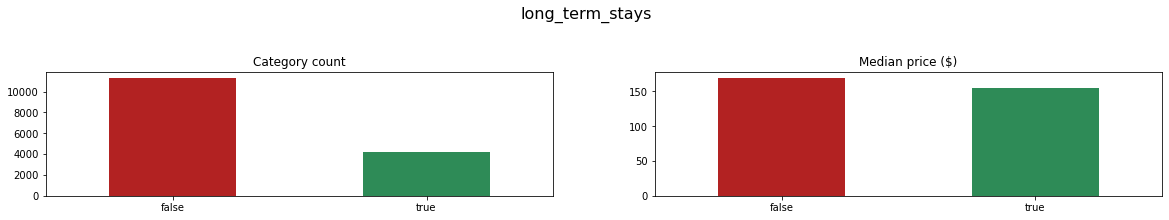

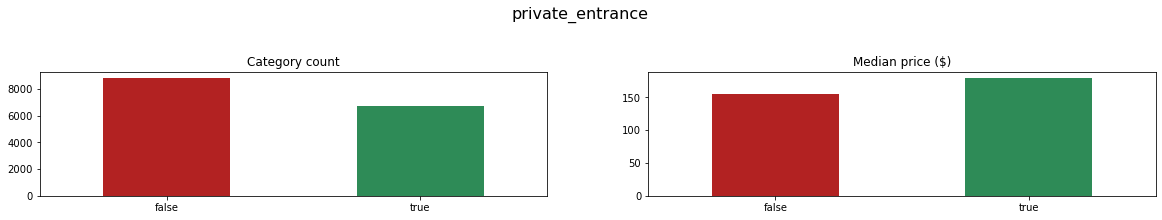

In [40]:
for col in airbnb.iloc[:,13:].columns:
    binary_count_and_price_plot(col, figsize=(20,3))

## **4.4. Location**

*Question: which locations have a higher influence on the price of a listing?*

Answer: listings with a lower price can be found in the Palma, and listings with higher prices can be found in Alcudia. We can also determine that locations closer to the beachfront are more likely to have a higher price.

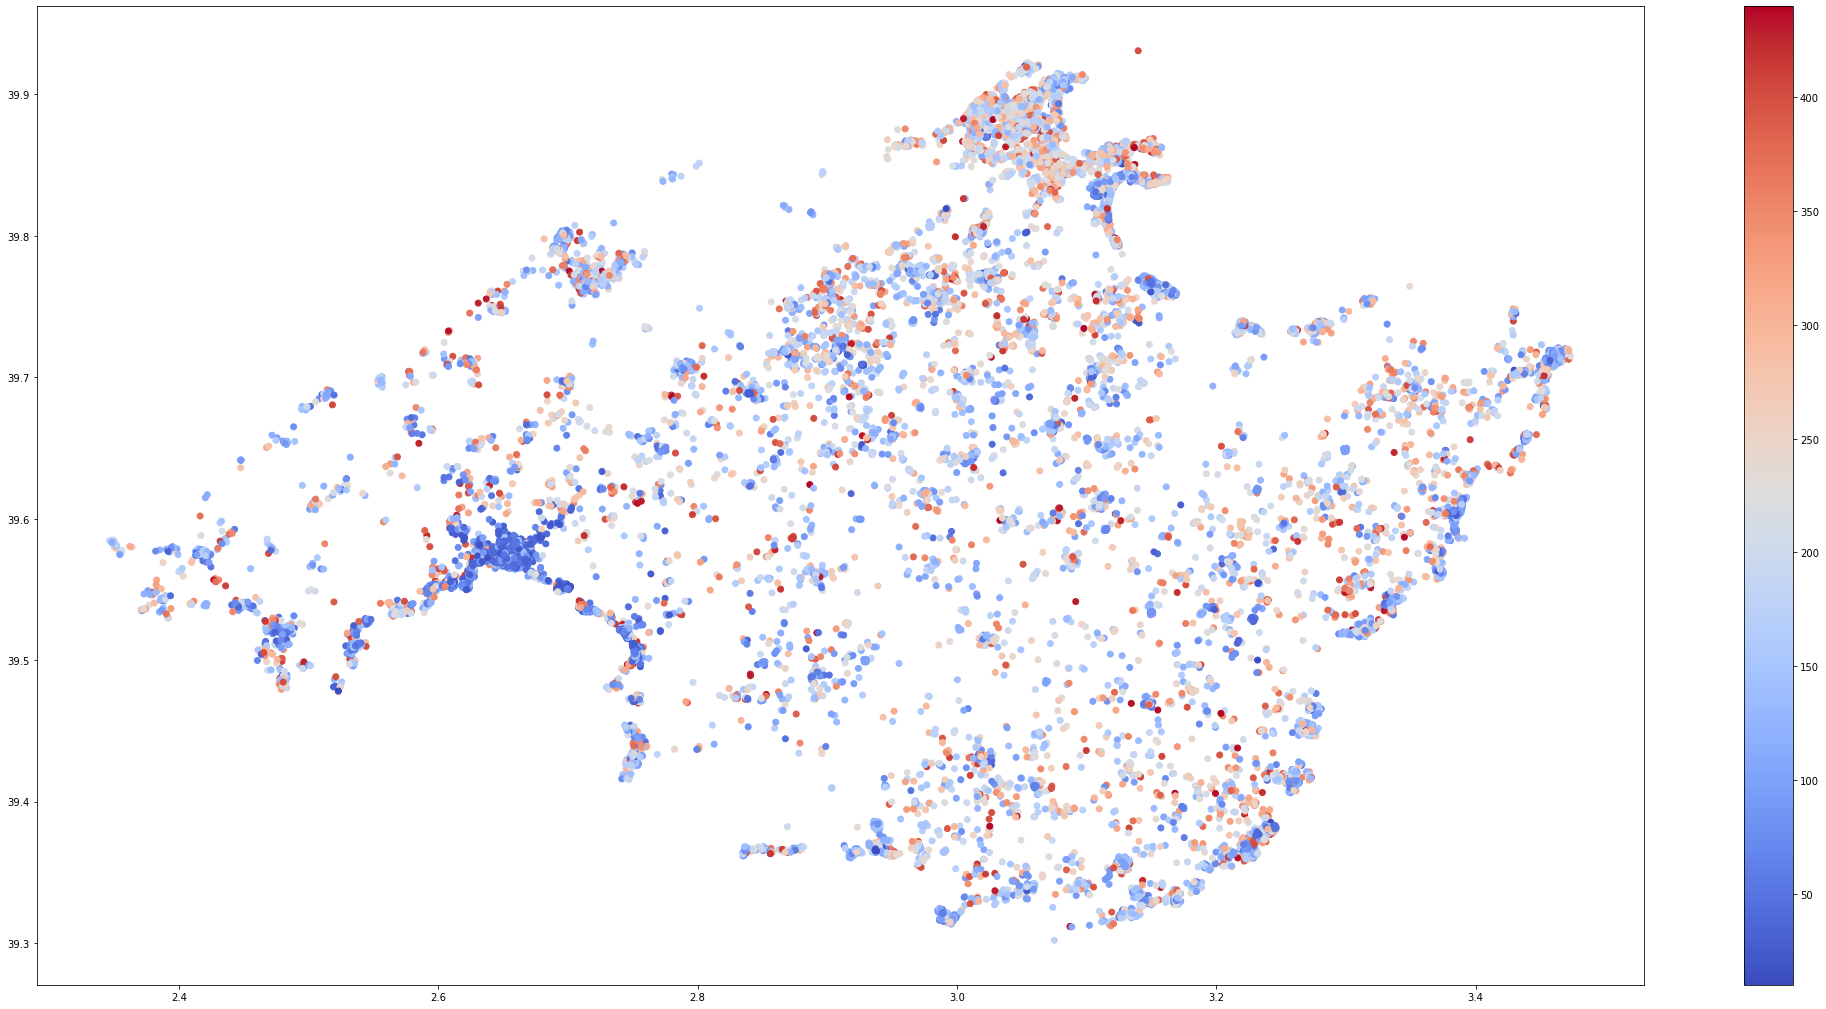

In [41]:
plt.subplots(figsize=(36,18))
plt.scatter(x=airbnb.longitude, y=airbnb.latitude, c=airbnb.price, cmap='coolwarm')
plt.colorbar()
plt.show()

***

# **5. Creating the regression models** <a class="anchor" id="fifth-bullet"></a>

### *5.0.1 Library imports*

**NOTE**: The library ``xgboost`` must be installed. A line with its installation has been included in the chunk below. 

In [42]:
import time
from numpy.random import seed
seed(123)
from datetime import datetime

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### *5.0.2. Function definitions*

In [43]:
def predict_target(model, X_train, y_train, X_test, y_test):
    '''
    Fits the model to the given training data and predicts the test data. MSE, MAE and R squared are 
    computed to determine the error in both the training and testing datasets. 
    '''
    model.fit(X_train, y_train)
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    actual_price = mms.inverse_transform(pd.DataFrame(y_test))
    predicted_price = np.round(mms.inverse_transform(pd.DataFrame(val_preds)), 3)
    diff = np.round(abs(np.subtract(actual_price, predicted_price)), 3)

    df_predictions = pd.DataFrame(np.hstack((actual_price, predicted_price, diff)), columns=['Actual Price', 'Predicted Price', 'Difference'])
    
    # MSE, MAE and r squared values
    print("Training RMSE:", round(np.sqrt(mean_squared_error(y_train, training_preds)),4))
    print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_test, val_preds)),4))
    print("\nTraining MAE:", round(mean_absolute_error(y_train, training_preds),4))
    print("Validation MAE:", round(mean_absolute_error(y_test, val_preds),4))
    print("\nTraining r2:", round(r2_score(y_train, training_preds),4))
    print("Validation r2:", round(r2_score(y_test, val_preds),4))
    print("\n")
    
    return model, df_predictions

In [44]:
def find_best_params(model, param_grid, model_name, X_train, y_train):
    '''
    Applies GridSearch to the model by taking all the combinations of parameters 
    found in the param_grid. Returns the best combination of hyperparameters. 
    '''
    search = GridSearchCV(model, param_grid, n_jobs=-1)
    search.fit(X_train, y_train)
    print(f"Best parameter for {model_name} model (CV score={search.best_score_}): {search.best_params_}\n")
    return search.best_params_

In [45]:
def scores_cv(model, cv, X, y):
    '''
    Cross validates the given model. 
    '''
    print("*******************************************\nCross validation of the model\n*******************************************")
    cv = ShuffleSplit(n_splits=cv, test_size=0.2, random_state=0)
    scores = cross_validate(model, X, y, cv=cv,
                            scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
                            return_train_score=True)
    return pd.DataFrame.from_dict(scores, orient='index')

## **5.1. Preparing the data for modeling** <a class="anchor" id="fifth-first-bullet"></a>

### *5.1.1. Categorical data*

Categorical variables will now be one-hot encoded:

In [46]:
transformed_df = pd.get_dummies(airbnb)

### *5.1.2. Collinearity detection*

The dataset can now be assessed for multi-collinearity.

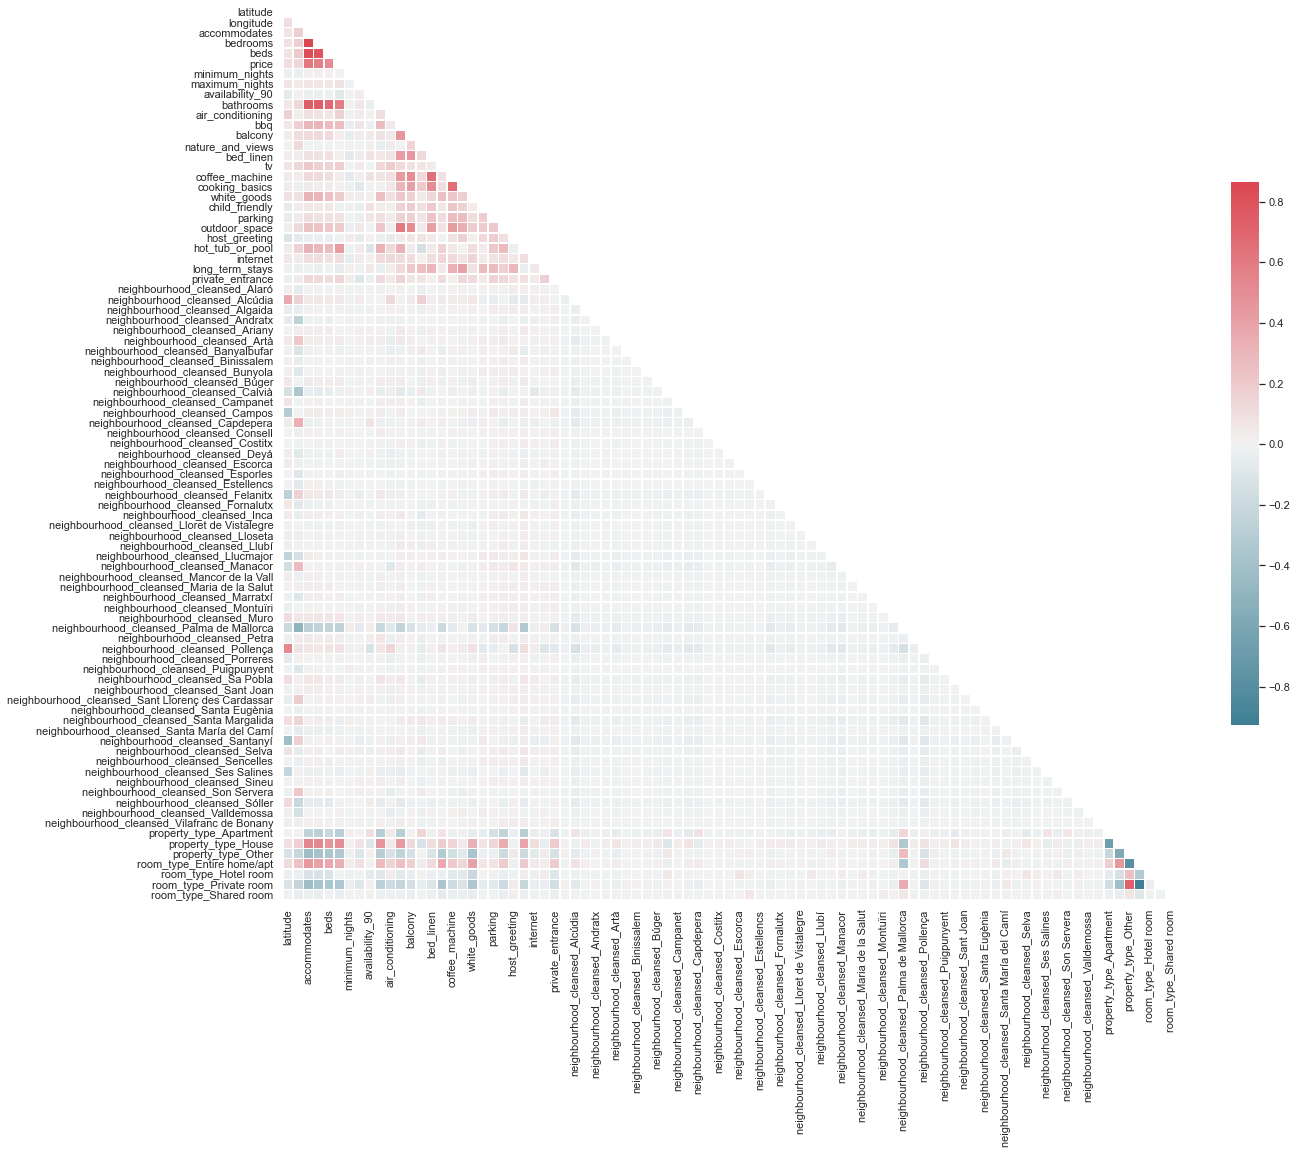

In [47]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

Areas of multi-collinearity:

- Beds, bedrooms and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been a more high priority search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms.
- There are strong negative correlations between houses and apartments, and between private rooms and entire homes (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

In [48]:
transformed_df = transformed_df.drop(columns=['bedrooms',
                                              'beds',
                                              'bathrooms',
                                              'coffee_machine',
                                              'room_type_Private room'])

Let's check again:

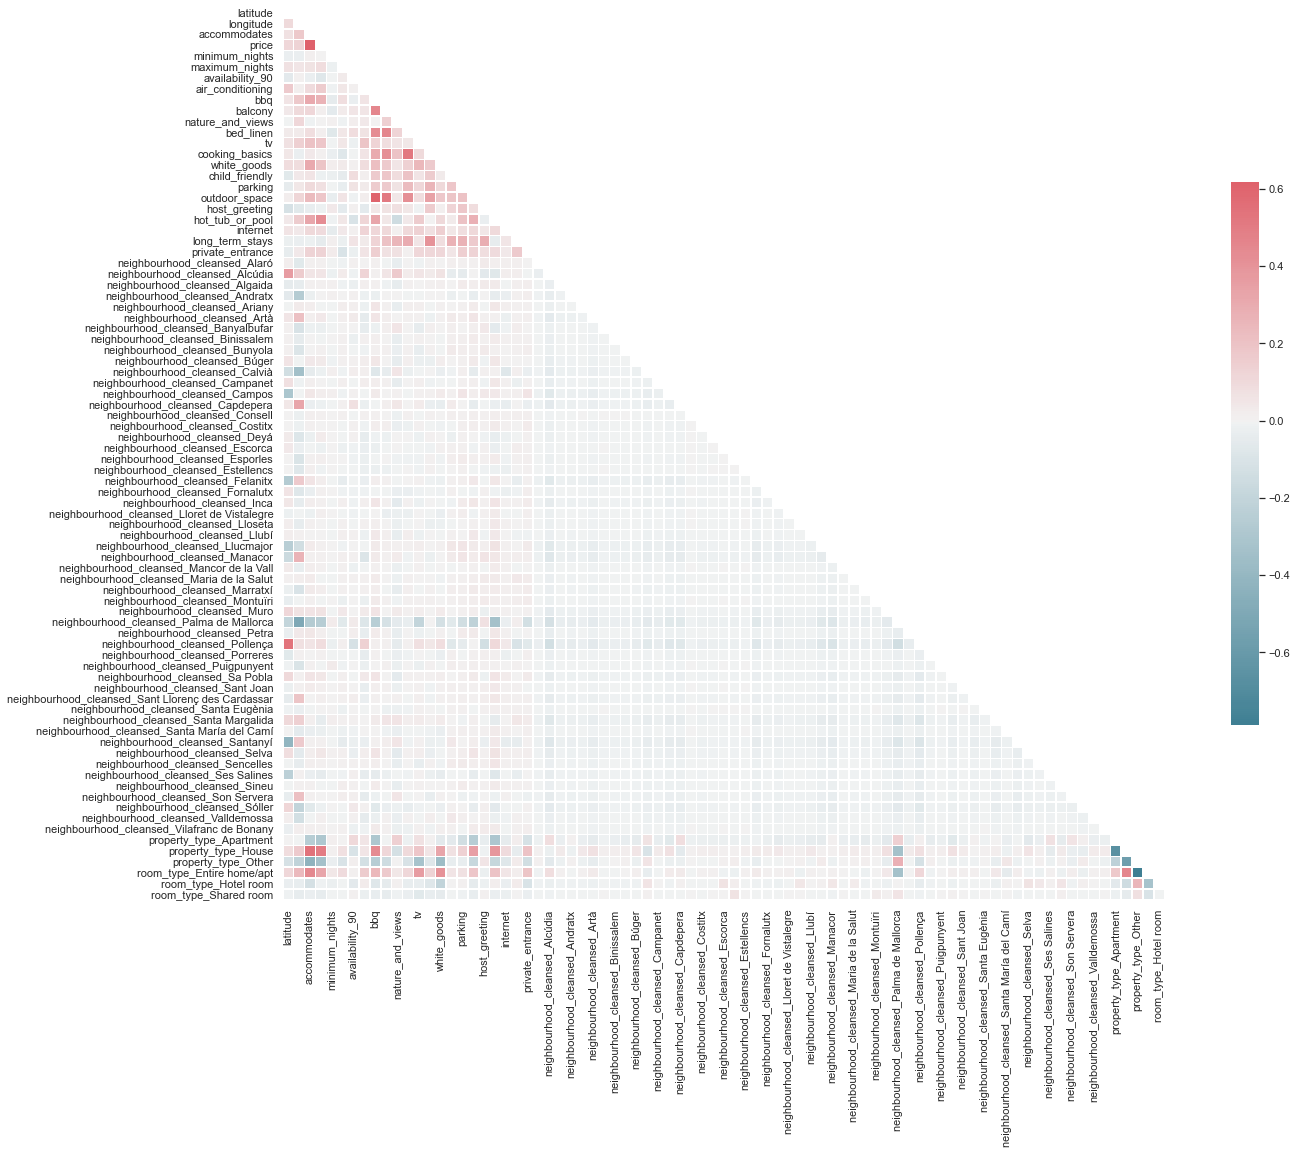

In [49]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

There are still a few variables that have a high correlation. However, as it does not surpass the value of 0.7, we can leave them in the dataframe.

### *5.1.3. Features with highest correlation with the target variable*

Let's also see which variables have the most correlation (in the absolute value) with the target variable. A higher correlation means that the feature has a bigger influence on the value of the target variable. A positive correlation means that the *higher* the value of the feature (in numerical features) or the mere presence of a feature (in categorical features), the target variable has a bigger value. For negative correlation, the higher the correlation the less value the target variable will have.

In [50]:
corr_price = transformed_df[transformed_df.columns[0:]].corr()['price'][:]
corr_price[np.abs(corr_price) > 0.1].sort_values(ascending=False)

price                                       1.000000
accommodates                                0.619077
property_type_House                         0.498664
hot_tub_or_pool                             0.431336
room_type_Entire home/apt                   0.332979
bbq                                         0.262045
white_goods                                 0.193177
outdoor_space                               0.190036
tv                                          0.185306
air_conditioning                            0.161366
longitude                                   0.134060
private_entrance                            0.132737
latitude                                    0.107702
neighbourhood_cleansed_Palma de Mallorca   -0.256354
property_type_Apartment                    -0.288543
property_type_Other                        -0.335382
Name: price, dtype: float64

From this analysis, we can determine that houses with a high number of accomodates have a higher price. Also, if the listing is in the neighborhood Palma de Mallorca, it is more likely to have a smaller price. 

### *5.1.3. Standardising and normalising*

In [79]:
numerical_columns = ['accommodates', 'availability_90', 'maximum_nights', 'minimum_nights', 'price']

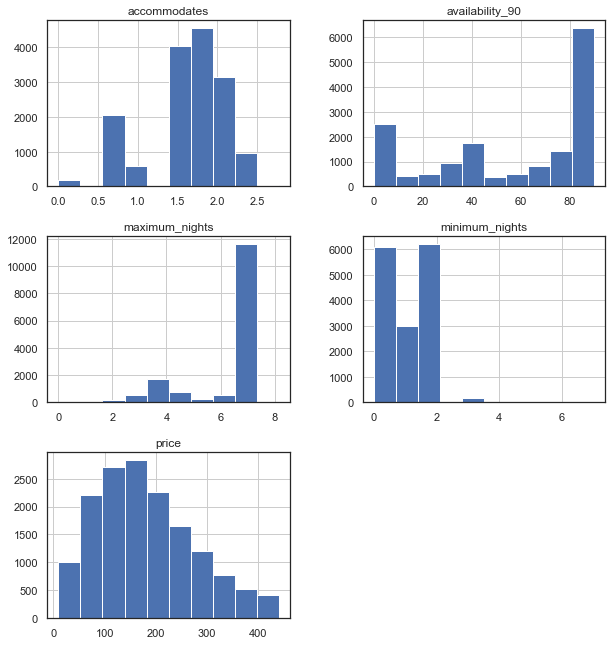

In [80]:
transformed_df[numerical_columns].hist(figsize=(10,11));

Other than the ``price`` and ``availability_90``, the remaining numerical features are all postively skewed and could benefit from log transformation.

In [53]:
# Log transforming columns
for col in numerical_columns:
    if col != 'price' and col != 'availability_90':
        transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
        transformed_df[col] = np.log(transformed_df[col])

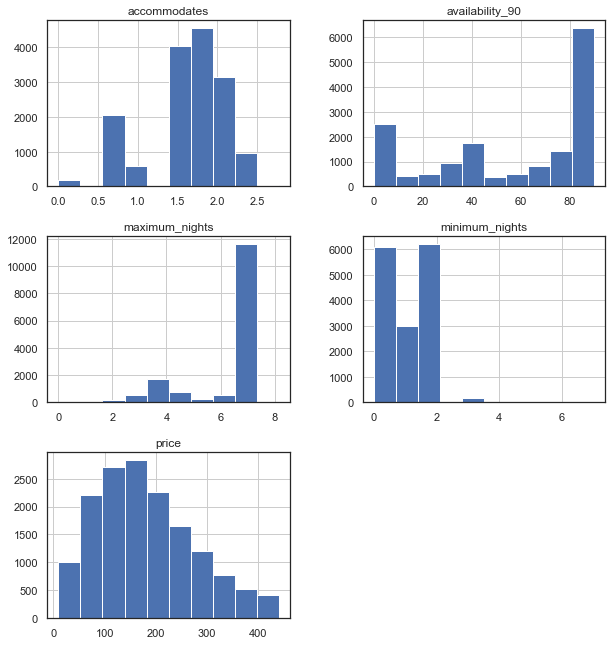

In [54]:
transformed_df[numerical_columns].hist(figsize=(10,11));

### *5.1.4. Training and testing sets*

In [56]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scaling the X
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=list(X_test.columns))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

X_train[X_train.select_dtypes(include='float64').columns] = X_train[X_train.select_dtypes(include='float64').columns].astype(int)
X_test[X_test.select_dtypes(include='float64').columns] = X_test[X_test.select_dtypes(include='float64').columns].astype(int)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Scaling the y
mms = MinMaxScaler()
y_train = mms.fit_transform(pd.DataFrame(y_train))
y_test = mms.fit_transform(pd.DataFrame(y_test))
y_scaled = mms.fit_transform(pd.DataFrame(y))

cv = 5

### *5.1.5. Dimensionality reduction*

In [57]:
param_grid = {
    'n_components': range(transformed_df.shape[1])
}
pca = PCA()
search = GridSearchCV(pca, param_grid, n_jobs=-1)
search.fit(X_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-87.251):
{'n_components': 78}


/opt/anaconda3/envs/ds-uib/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


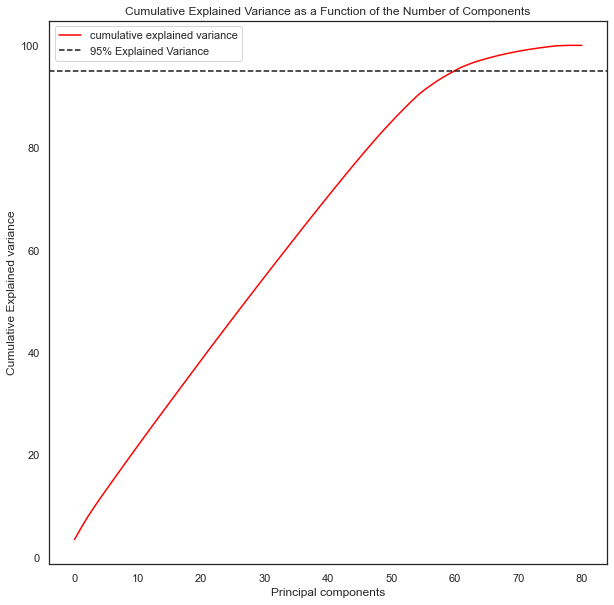

In [58]:
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [59]:
print(f"The total number of variables in the original data is {transformed_df.shape[1]}, and the PCA components is {search.best_params_['n_components']}.")

The total number of variables in the original data is 82, and the PCA components is 78.


PCA will not be applied to this dataset because the number of variables is not reduced significantly. 

## **5.2. Implementing the models** <a class="anchor" id="fifth-second-bullet"></a>

### *5.2.1. Models used*

The models used in this analysis can be grouped in three different types: (1) **linear models**, (2) **tree-based models** and (3) **clustering-like models**. There is a total of **6 models** used. 

##### **1. Linear models**

- ``LinearRegression`` Regression analysis that tries to determine the linear relationship between the independent variable(s) (``x``) and dependent variable (``y``). 


##### **2. Tree-based models**

- ``DecisionTreeRegressor`` Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes [2]. 

- ``GradientBoostingRegressor`` "Boosting" in machine learning is a way of combining multiple simple models into a single composite model. This is also why boosting is known as an additive model, since simple models (also known as weak learners) are added one at a time, while keeping existing trees in the model unchanged. As we combine more and more simple models, the complete final model becomes a stronger predictor. The term "gradient" in "gradient boosting" comes from the fact that the algorithm uses gradient descent to minimize the loss [3].

- ``RandomForestRegressor`` Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

- ``XGBRegressor`` XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost is used for supervised learning problems, where we use the training data (with multiple features) $x_i$ to predict a target variable $y_i$ [4].

##### **3. Clustering-like models**

- ``KNeighborsRegressor`` Regression based on *k-nearest neighbors*. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

### *5.2.2. Metrics choosed to validate the models*

In order to determine wether a model is good at making predictions for a given dataset, it is neccesary to evaluate it with some metrics. These metrics usually describe the error in the predictions. In this analysis, the metrics used to evaluate the regression models are:

- **Root Mean Squared Error (RMSE)** - RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. 

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{j = 1}^n (y_j - \hat{y}_j)^2}$$



- **Mean Absolute Error (MAE)** - Measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

$$\text{MAE} = \frac{1}{n}\sum_{j = 1}^n |y_j - \hat{y}_j|$$


- **$R^2$** - Proportion of the variance in the dependent variable that is predictable from the independent variable(s).


### *5.2.3. Predicting the prices of Airbnb listings*

#### ``LinearRegression``

In [60]:
lin_reg, lin_predictions = predict_target(LinearRegression(), X_train, y_train.ravel(), X_test, y_test.ravel())
lin_score = scores_cv(LinearRegression(), cv, X_scaled, y_scaled.ravel())
lin_score.mean(axis=1)

Training RMSE: 0.1671
Validation RMSE: 8805052239.7029

Training MAE: 0.1303
Validation MAE: 4411900287.4636

Training r2: 0.4332
Validation r2: -1.5822047637754633e+21


*******************************************
Cross validation of the model
*******************************************


fit_time                             0.021520
score_time                           0.004044
test_neg_root_mean_squared_error    -0.159558
train_neg_root_mean_squared_error   -0.157868
test_neg_mean_absolute_error        -0.123740
train_neg_mean_absolute_error       -0.122050
test_r2                              0.491341
train_r2                             0.488272
dtype: float64

In [100]:
lin_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,-2.728490e+12,2.728490e+12
1,167.835294,-4.287627e+12,4.287627e+12
2,116.235294,1.781590e+02,6.192400e+01
3,146.588235,2.164110e+02,6.982300e+01
4,133.435294,1.717880e+02,3.835300e+01
5,197.176471,7.357200e+01,1.236040e+02
6,178.964706,1.844250e+02,5.460000e+00
7,97.011765,-2.308722e+12,2.308722e+12
8,291.270588,-4.287627e+12,4.287627e+12
9,248.776471,2.291990e+02,1.957700e+01


This first model is not quite capable of making accurate predictions: it has a $R^2 = 0.48$ for the training data and $R^2 = 0.49$ for the testing data. 

However, there is not a big difference between the errors made in the training and testing datasets, so there is a **large bias** and **smaller variance**, as it is characteristic of linear models such as the ``LinearRegression`` model.

#### ``DecisionTreeRegressor``

In [62]:
# DecisionTreeRegressor
parameters = {'criterion': ['mse', 'mae'], 'splitter': ['random', 'best']}
dtr_params = find_best_params(DecisionTreeRegressor(), parameters, 'DecisionTreeRegressor', X_train, y_train)

dtr_reg, dtr_predictions = predict_target(DecisionTreeRegressor(criterion=dtr_params['criterion'],
                                               splitter=dtr_params['splitter']),
                         X_train, y_train.ravel(), X_test, y_test.ravel())
dtr_score = scores_cv(DecisionTreeRegressor(), cv, X_scaled, y_scaled.ravel())
dtr_score.mean(axis=1)

Best parameter for DecisionTreeRegressor model (CV score=0.13306514587461676): {'criterion': 'mse', 'splitter': 'random'}

Training RMSE: 0.0582
Validation RMSE: 0.207

Training MAE: 0.0208
Validation MAE: 0.1499

Training r2: 0.9311
Validation r2: 0.1258


*******************************************
Cross validation of the model
*******************************************


fit_time                             0.144744
score_time                           0.004561
test_neg_root_mean_squared_error    -0.199089
train_neg_root_mean_squared_error   -0.002142
test_neg_mean_absolute_error        -0.141509
train_neg_mean_absolute_error       -0.000050
test_r2                              0.207735
train_r2                             0.999898
dtype: float64

In [63]:
dtr_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,119.00,38.176
1,167.835294,205.50,37.665
2,116.235294,245.00,128.765
3,146.588235,213.00,66.412
4,133.435294,118.50,14.935
5,197.176471,28.00,169.176
6,178.964706,192.00,13.035
7,97.011765,256.00,158.988
8,291.270588,171.00,120.271
9,248.776471,229.00,19.776


This second model has a $R^2 = 0.99$ for the training data and $R^2 = 0.20$ for the testing data; it has a **small bias** and **large variance**. It can be seen that it has been *overfitted to the training data* - it is capable of making accurate predictions for the training data, but when given new data it is not able to make correct predictions. 

Comparing the RMSE values of the previous model  ($\text{RMSE} = 0.159$) and this one ($\text{RMSE} = 0.199$), it can be seen that the error has increased, meaning that this model is less appropiate for predicting the price. 

#### ``RandomForestRegressor``

In [64]:
raf_reg, raf_predictions = predict_target(RandomForestRegressor(), X_train, y_train.ravel(), X_test, y_test.ravel())
raf_score = scores_cv(RandomForestRegressor(), cv, X_scaled, y_scaled.ravel())
raf_score.mean(axis=1)

Training RMSE: 0.0784
Validation RMSE: 0.1616

Training MAE: 0.0541
Validation MAE: 0.1214

Training r2: 0.8751
Validation r2: 0.467


*******************************************
Cross validation of the model
*******************************************


fit_time                             8.502130
score_time                           0.091535
test_neg_root_mean_squared_error    -0.145956
train_neg_root_mean_squared_error   -0.054202
test_neg_mean_absolute_error        -0.106465
train_neg_mean_absolute_error       -0.039326
test_r2                              0.574177
train_r2                             0.939674
dtype: float64

In [65]:
raf_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,114.610,33.786
1,167.835294,207.798,39.963
2,116.235294,206.510,90.275
3,146.588235,211.517,64.929
4,133.435294,124.795,8.640
5,197.176471,40.413,156.763
6,178.964706,141.528,37.437
7,97.011765,233.750,136.738
8,291.270588,192.190,99.081
9,248.776471,251.505,2.729


This third model is similar to the previous model, as it uses decision trees to make the predictions. However, it has a $R^2 = 0.93$ for the training data and $R^2 = 0.57$ for the testing data. This model is also overfitted to the training data. However, it has the best performance so far. It has improved significantly its accuracy when predicting the testing data, both when compared with the ``LinearRegression`` model and ``DecisionTreeRegressor`` model.

#### ``GradientBoostingRegressor``

In [66]:
# GradientBoostingRegressor
#parameters = {'loss': ['ls', 'huber'], 'criterion': ['mse', 'mae']}
#grb_params = find_best_params(GradientBoostingRegressor(), parameters, 'GradientBoostingRegressor', X_train, y_train)

gbr_reg, gbr_predictions = predict_target(GradientBoostingRegressor(), X_train, y_train.ravel(), X_test, y_test.ravel())
gbr_score = scores_cv(GradientBoostingRegressor(), cv, X_scaled, y_scaled.ravel())
gbr_score.mean(axis=1)

Training RMSE: 0.1583
Validation RMSE: 0.1626

Training MAE: 0.1212
Validation MAE: 0.1264

Training r2: 0.4909
Validation r2: 0.4603


*******************************************
Cross validation of the model
*******************************************


fit_time                             2.212486
score_time                           0.008152
test_neg_root_mean_squared_error    -0.150703
train_neg_root_mean_squared_error   -0.146439
test_neg_mean_absolute_error        -0.114408
train_neg_mean_absolute_error       -0.111097
test_r2                              0.546137
train_r2                             0.559681
dtype: float64

In [67]:
gbr_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,133.969,53.145
1,167.835294,170.904,3.069
2,116.235294,154.181,37.946
3,146.588235,225.422,78.834
4,133.435294,155.123,21.688
5,197.176471,47.106,150.070
6,178.964706,183.492,4.527
7,97.011765,212.273,115.261
8,291.270588,233.857,57.414
9,248.776471,233.259,15.517


This model has a lower $R^2$ training score than the ``RandomForestRegressor``: it has a $R^2 = 0.55$ for the training data and $R^2 = 0.54$ for the testing data. It can be seen here that the model was not overfitted and, even if it was not able to learn everything from the training data, it is capable of making correct predictions with a small error. 

#### ``KNeighborsRegressor``

In [68]:
# KNeighborsRegressor
#parameters = {'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'brute']}
#knr_params = find_best_params(KNeighborsRegressor(), parameters, 'KNeighborsRegressor', X_train, y_train)

knr_reg, knr_predictions = predict_target(KNeighborsRegressor(), X_train, y_train.ravel(), X_test, y_test.ravel())
knr_score = scores_cv(KNeighborsRegressor(), cv, X_scaled, y_scaled.ravel())
knr_score.mean(axis=1)

Training RMSE: 0.1465
Validation RMSE: 0.1806

Training MAE: 0.111
Validation MAE: 0.1386

Training r2: 0.5643
Validation r2: 0.3342


*******************************************
Cross validation of the model
*******************************************


fit_time                             0.238950
score_time                           2.599852
test_neg_root_mean_squared_error    -0.175350
train_neg_root_mean_squared_error   -0.140481
test_neg_mean_absolute_error        -0.133632
train_neg_mean_absolute_error       -0.106490
test_r2                              0.385584
train_r2                             0.594773
dtype: float64

In [69]:
knr_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,163.0,82.176
1,167.835294,153.8,14.035
2,116.235294,200.0,83.765
3,146.588235,231.2,84.612
4,133.435294,137.6,4.165
5,197.176471,43.2,153.976
6,178.964706,270.6,91.635
7,97.011765,213.2,116.188
8,291.270588,204.2,87.071
9,248.776471,210.6,38.176


This model has a $R^2 = 0.59$ for the training data and $R^2 = 0.38$ for the testing data. It has increased the errors made in the predictions, so this model is worse than the rest that we have seen.

#### ``XGBRegressor``

In [70]:
xgb_reg, xgb_predictions = predict_target(xgb.XGBRegressor(), X_train, y_train.ravel(), X_test, y_test.ravel())
xgb_score = scores_cv(xgb.XGBRegressor(), cv, X_scaled, y_scaled.ravel())
xgb_score.mean(axis=1)

Training RMSE: 0.127
Validation RMSE: 0.1597

Training MAE: 0.0943
Validation MAE: 0.1216

Training r2: 0.6727
Validation r2: 0.4794


*******************************************
Cross validation of the model
*******************************************


fit_time                             1.672183
score_time                           0.010787
test_neg_root_mean_squared_error    -0.145711
train_neg_root_mean_squared_error   -0.102041
test_neg_mean_absolute_error        -0.108157
train_neg_mean_absolute_error       -0.075433
test_r2                              0.575794
train_r2                             0.786196
dtype: float64

In [71]:
xgb_predictions.head(20)

,Actual Price,Predicted Price,Difference
0,80.823529,115.927002,35.103
1,167.835294,204.222000,36.387
2,116.235294,176.117996,59.883
3,146.588235,220.634003,74.046
4,133.435294,157.942993,24.508
5,197.176471,39.407001,157.769
6,178.964706,202.457993,23.493
7,97.011765,226.514999,129.503
8,291.270588,229.514008,61.757
9,248.776471,230.712006,18.064


The last model has given the best results It has a $R^2 = 0.78$ for the training data and $R^2 = 0.57$ for the testing data. The RMSE and MAE scores are also the lowest of all the models. 

An interesting analysis is to see which features (independent variables) of the dataset are more important when making the predictions with this model.

In [72]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True, ascending=False)
ft_weights_xgb_reg.head()

,weight
property_type_House,0.332783
hot_tub_or_pool,0.058140
room_type_Hotel room,0.040529
accommodates,0.028491
neighbourhood_cleansed_Muro,0.025109


The most important features is if **the listing is a house**. The rest of the features have significantly less importance. Below is a graph showing in ascending order the importante of each feature for this model. 

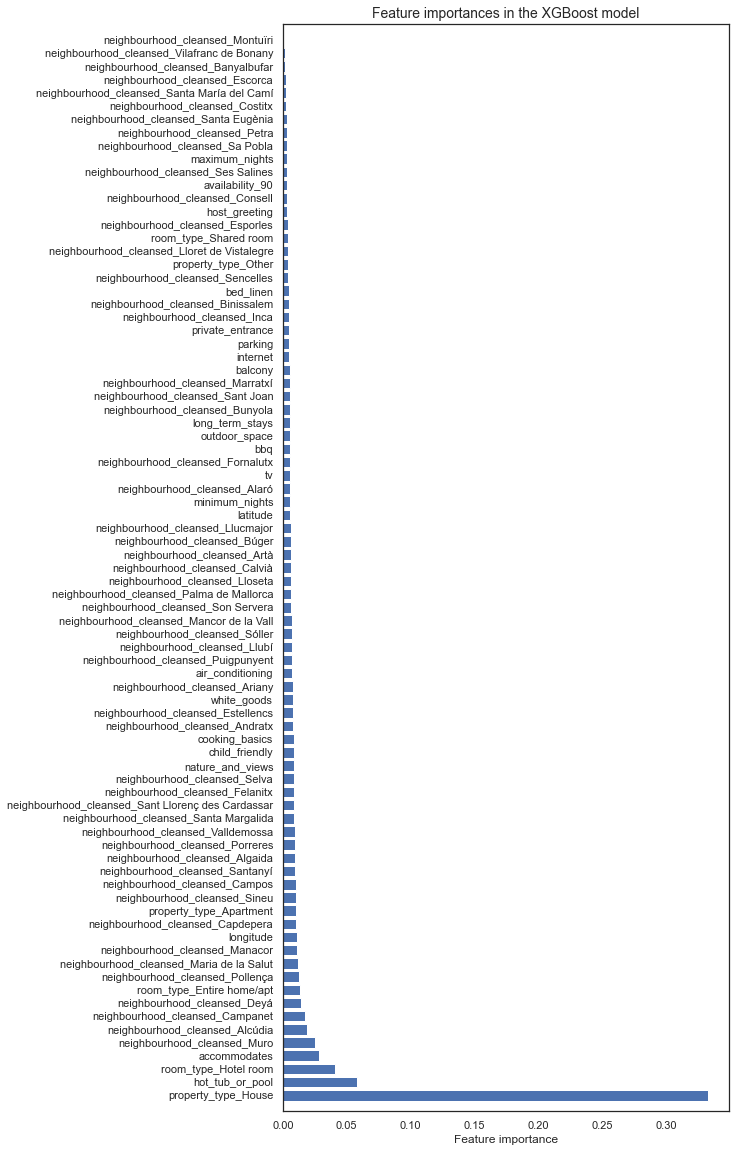

In [73]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### *5.2.4. Comparing the models*

The last step of this analysis is to compare all the values for each metric of all the models and determine which model makes the best predictions. 

In [104]:
df_results = pd.DataFrame(data=[lin_score.mean(axis=1),
                               dtr_score.mean(axis=1),
                               raf_score.mean(axis=1),
                               knr_score.mean(axis=1),
                               xgb_score.mean(axis=1), 
                               gbr_score.mean(axis=1)], 
                          index=['LinearRegression',
                                   'DecisionTreeRegressor',
                                   'RandomForestRegressor',
                                   'KNeighborsRegressor',
                                   'XGBRegressor',
                                'GradientBoostingRegressor'])
df_results = df_results.sort_values(["test_neg_root_mean_squared_error", "train_neg_mean_absolute_error"], ascending=(False, False))

In [105]:
df_results

,fit_time,score_time,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2
XGBRegressor,1.672183,0.010787,-0.145711,-0.102041,-0.108157,-0.075433,0.575794,0.786196
RandomForestRegressor,8.502130,0.091535,-0.145956,-0.054202,-0.106465,-0.039326,0.574177,0.939674
GradientBoostingRegressor,2.212486,0.008152,-0.150703,-0.146439,-0.114408,-0.111097,0.546137,0.559681
LinearRegression,0.021520,0.004044,-0.159558,-0.157868,-0.123740,-0.122050,0.491341,0.488272
KNeighborsRegressor,0.238950,2.599852,-0.175350,-0.140481,-0.133632,-0.106490,0.385584,0.594773
DecisionTreeRegressor,0.144744,0.004561,-0.199089,-0.002142,-0.141509,-0.000050,0.207735,0.999898


In descending order, the best models are:
1. ``XGBRegressor`` (Best model)
2. ``RandomForestRegressor``
3. ``GradientBoostingRegressor``
4. ``LinearRegression``
5. ``KNeighborsRegressor``
6. ``DecisionTreeRegressor`` (Worst model)

Plotting the values of each metric, we can see that ``XGBRegressor`` model has the lowest values for the error, and the biggest $R^2$ coefficient.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

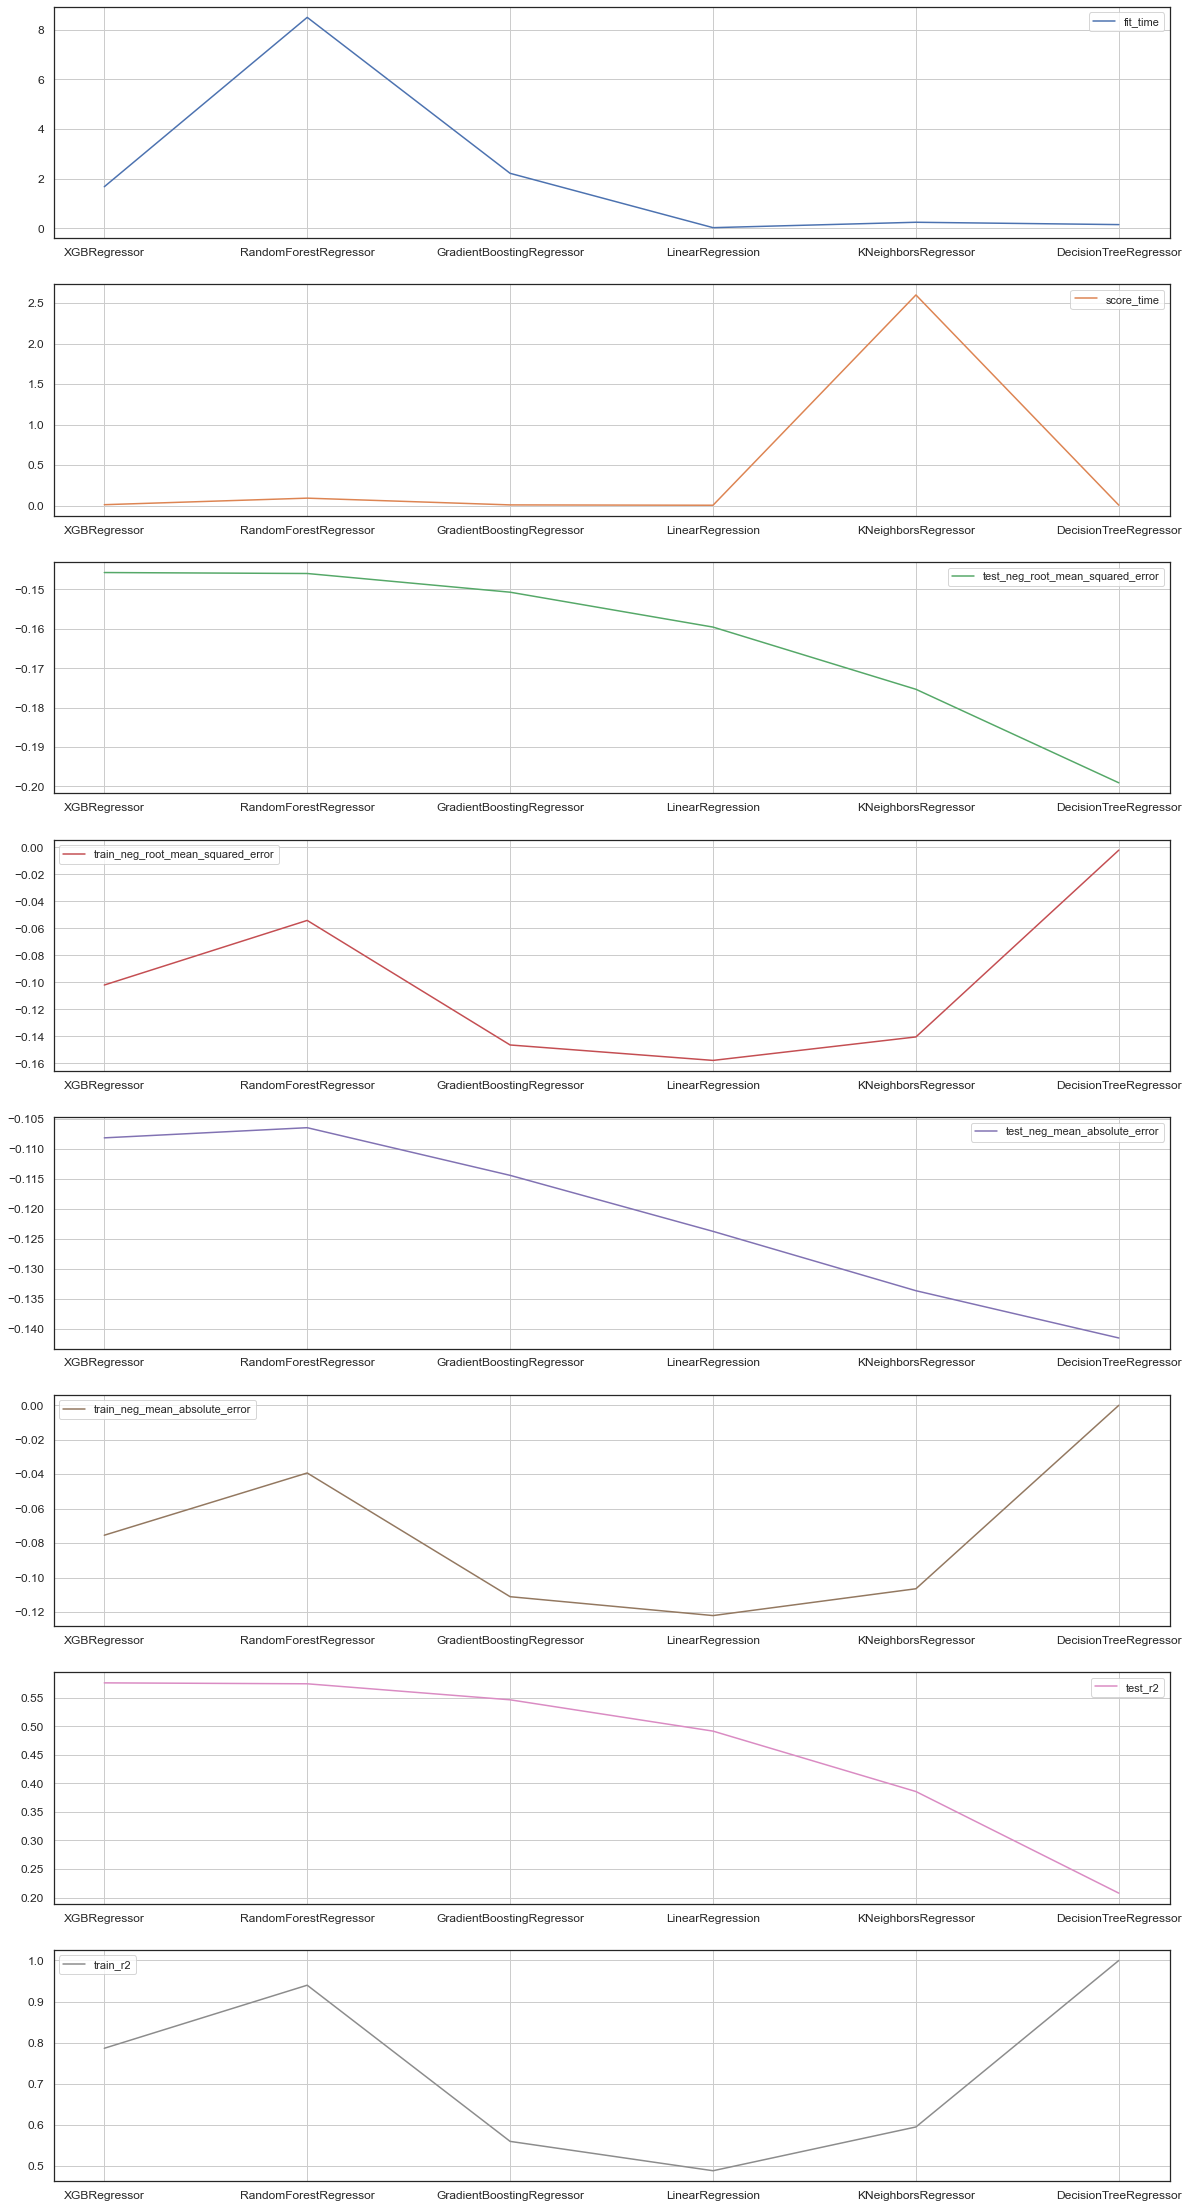

In [106]:
df_results.plot.line(figsize=(20, 40), subplots=True, sharex=False, grid=True, fontsize=12)

***

# **6. Conclusions** <a class="anchor" id="sixth-bullet"></a>

**The price of the listings of the *Airbnb* can be predicted with regression models**. However, it is extremely important to clean the given data in order to obtain good results with any regression model. The majority of the time dedicated in the implementation of this assignment was during the pre-processing phase. The information that can be extracted from the categorical features has a big influence of the performance of the model: if all the categorical features are one-hot encoded (OHE), the dataset can turn to have a total of 200 different features, which doesn't necessarily mean that the model will train better. By grouping together the values of the categorical features (for instance, the property-types) the number of columns have been reduced significantly. 

Another important aspect that ensures that the models can perform correctly is the scaling of the data. 

In conclusion, the steps previous to the actual implementation of the model (cleaning, pre-processing, scaling) is just as important (or even more) as choosing the right parameters for the model. 

***

# **7. Bibliography** <a class="anchor" id="seventh-bullet"></a>
[1] https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-1-how-to-clean-up-airbnb-data-a5d58e299f6c

[2] https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision%20tree%20builds%20regression%20or,decision%20nodes%20and%20leaf%20nodes.

[3] https://blog.paperspace.com/implementing-gradient-boosting-regression-python/

[4] https://xgboost.readthedocs.io/en/latest/tutorials/model.html